---
<h1 align='center' style="color:green"> Credit Card Fraud Detection</h1>

---

## 1. Importing Necessary Libraries

In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

### EXPLORE THE DATA

**Print the columns**

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Print the shape and description**

In [ ]:
print("Shape of the dataset:")
print(data.shape)

print("Description of the dataset:")
print(data.describe())

Shape of the dataset:
(284807, 31)
Description of the dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e

In [ ]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Data Visualization

Plot the histograms of each parameter, using .hist() in Matplotlib, and ultimately plt.show(). Learn more about how to do this, by searching online. Note, this is a straightforward code taking no more than 2 lines.

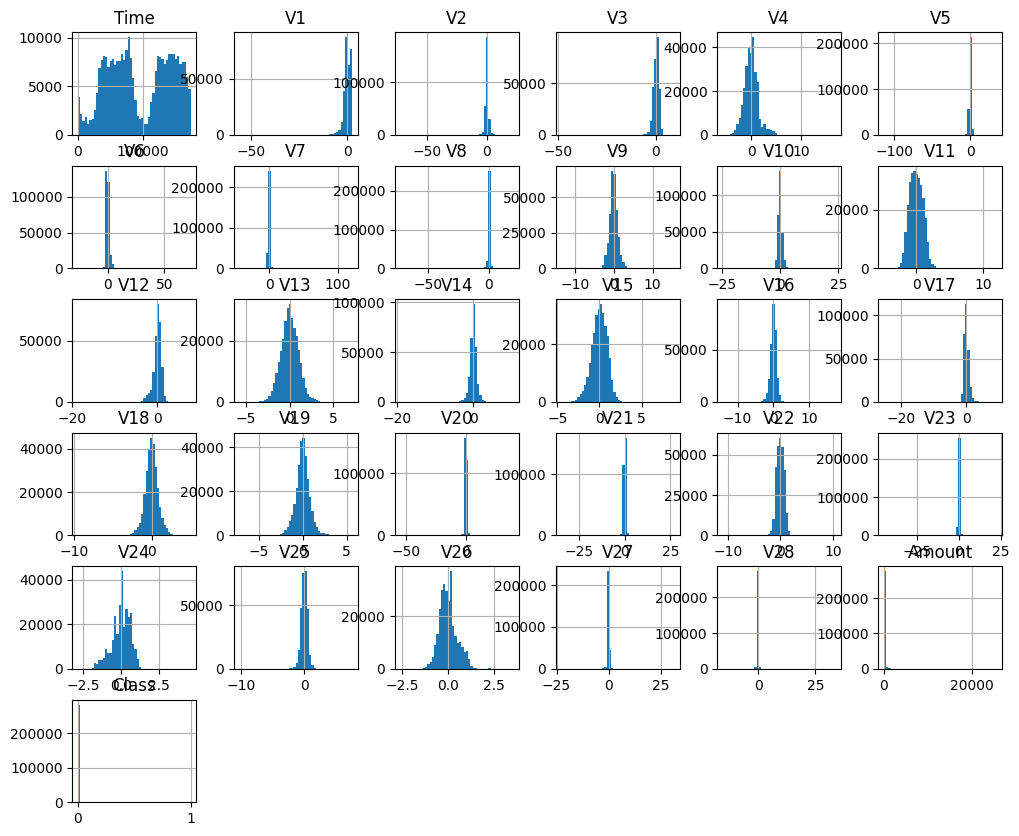

In [ ]:
data.hist(figsize=(12, 10), bins=50)
plt.show()

In [ ]:
num_fraud_cases = data[data['Class'] == 1].shape[0]
num_valid_cases = data[data['Class'] == 0].shape[0]

In [ ]:
print(f"Number of Fraud Cases: {num_fraud_cases}")
print(f"Number of Valid Cases: {num_valid_cases}")

Number of Fraud Cases: 492
Number of Valid Cases: 284315


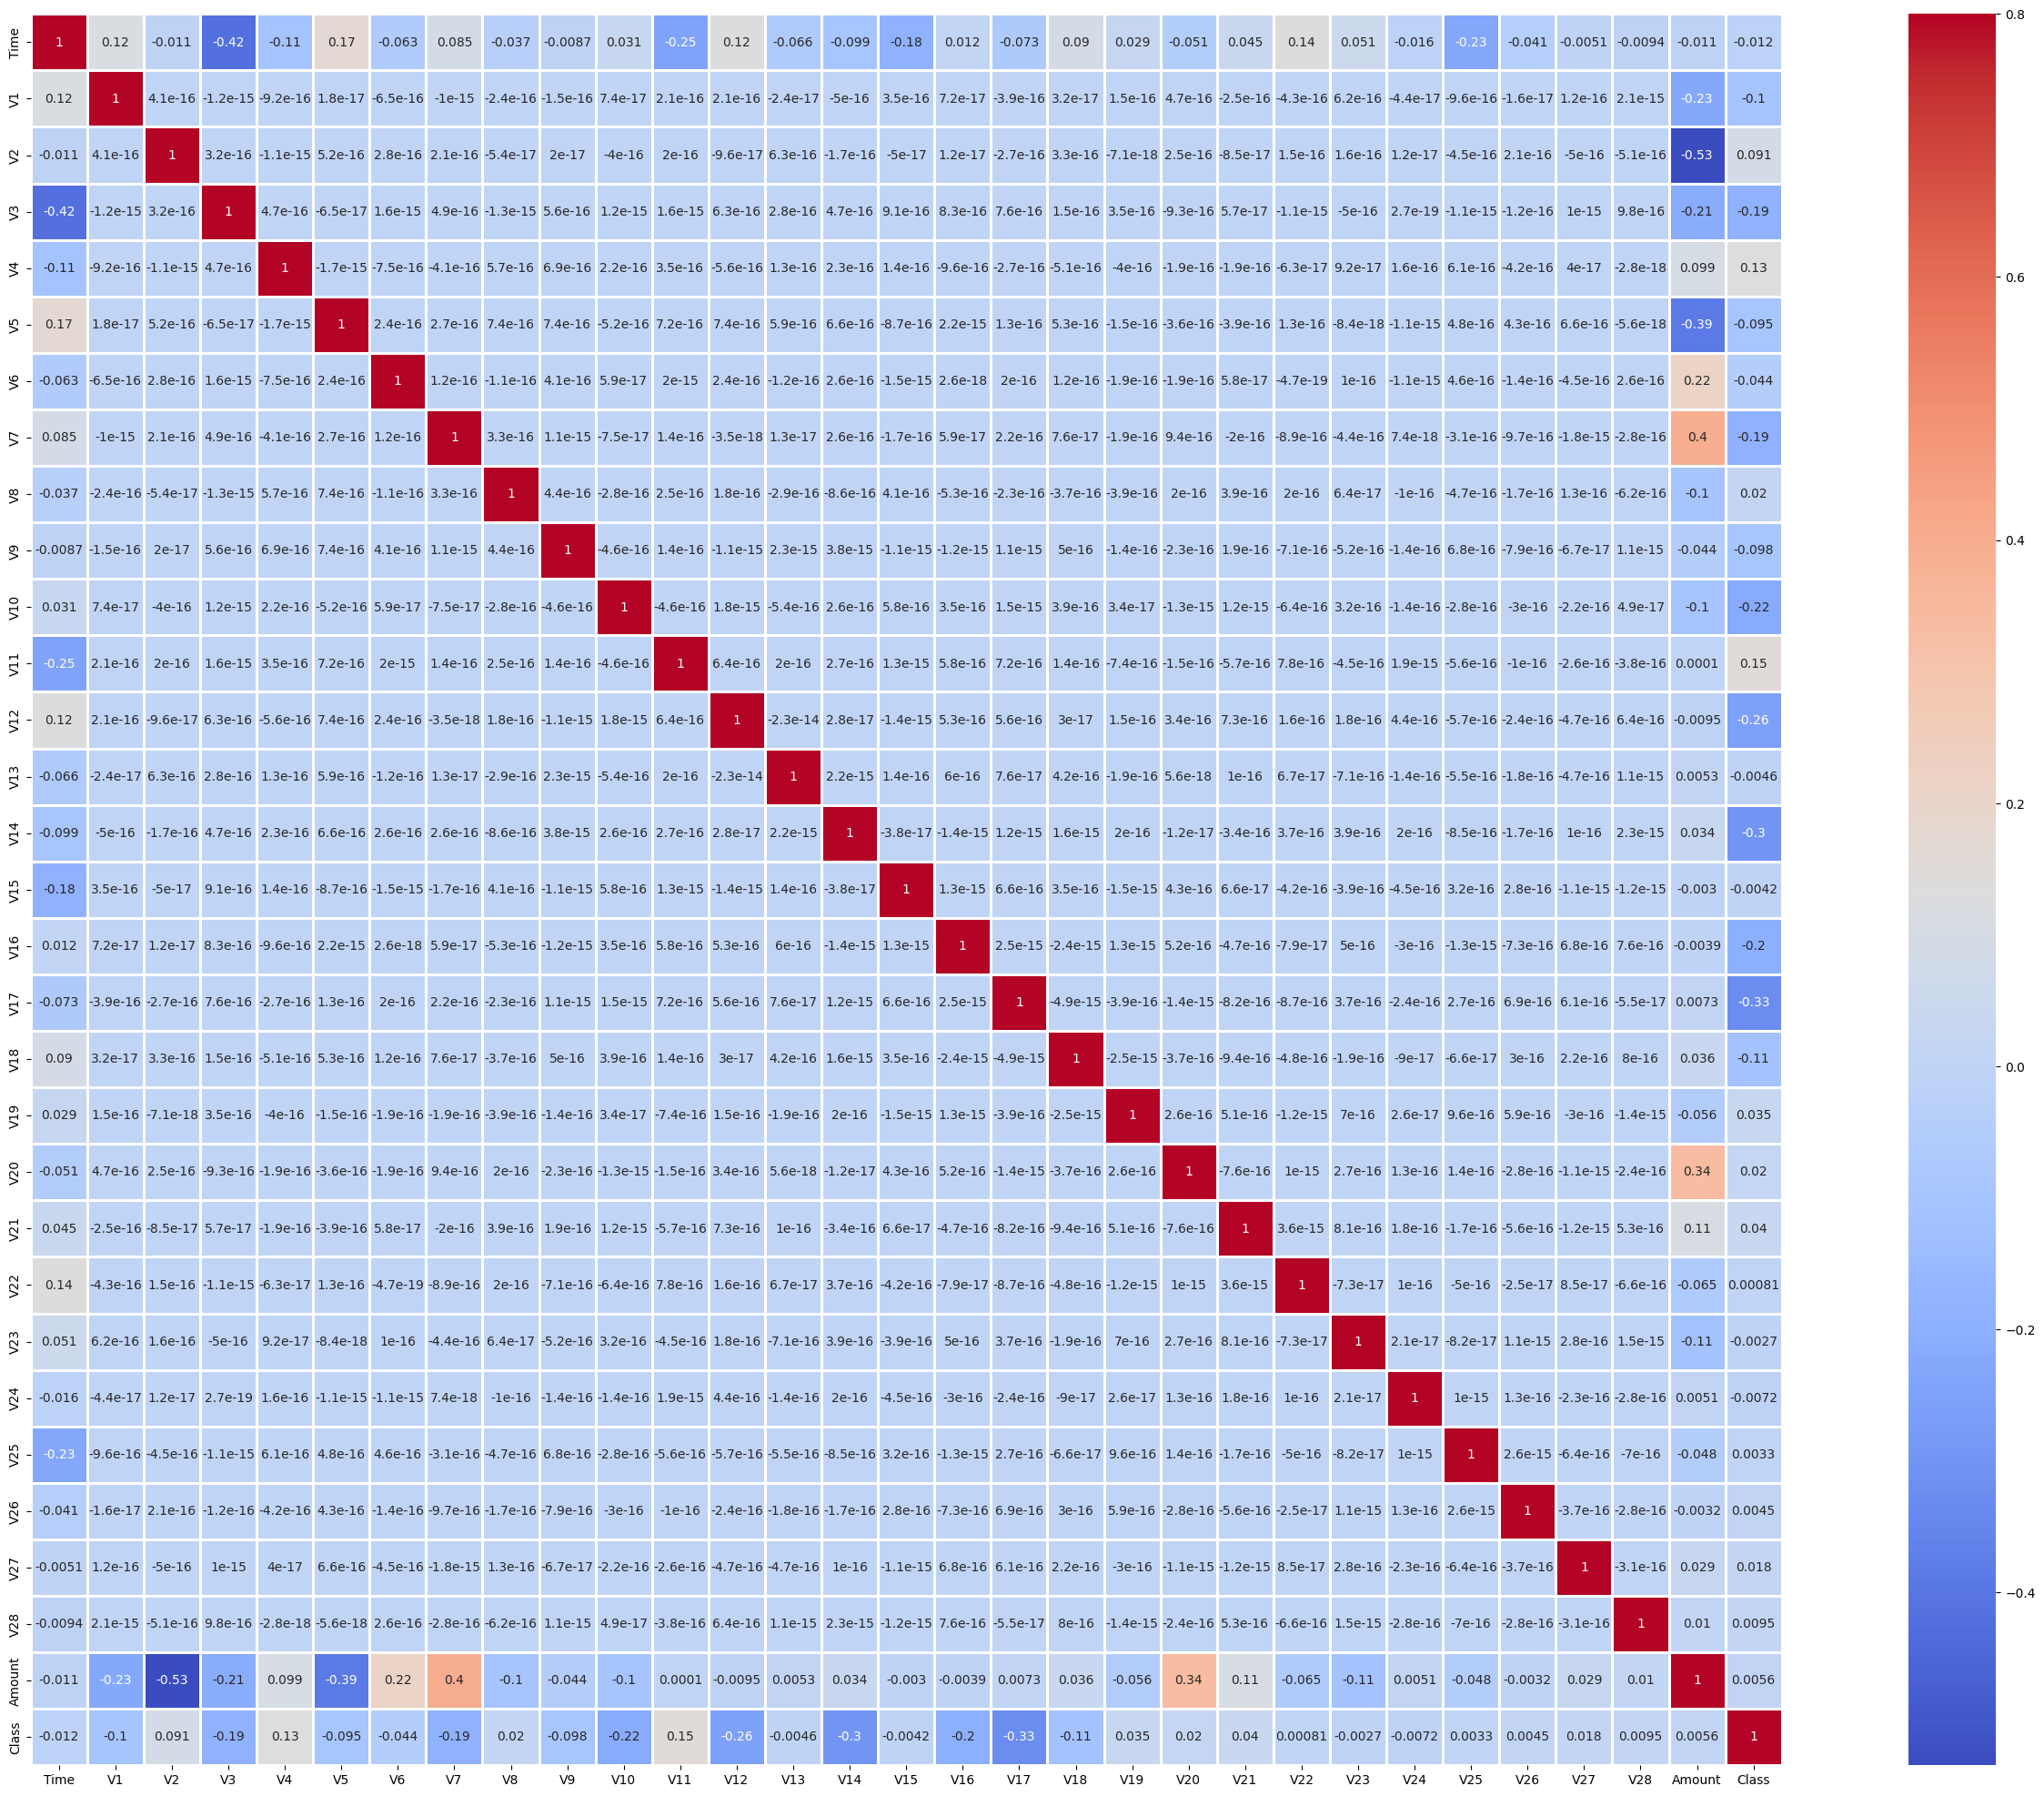

In [ ]:
corrmat = data.corr()
plt.figure(figsize=(36, 25))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap="coolwarm", linewidths=2)
plt.show()


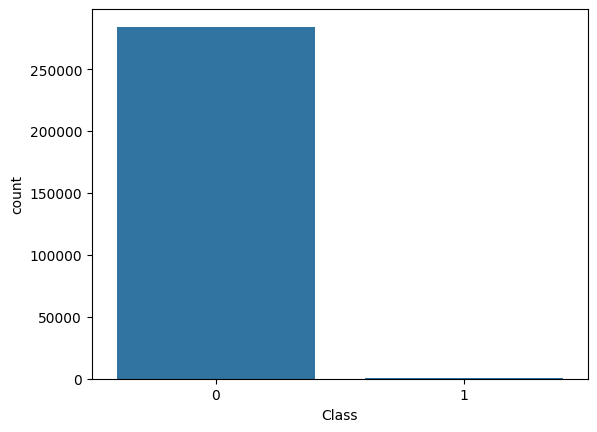

In [ ]:
sns.countplot(x='Class', data=data)
plt.show()

# Data processing

In [ ]:
minority_class_count = data[data['Class'] == 1].shape[0]
print(f"Number of samples in minority class (Class 1): {minority_class_count}")


Number of samples in minority class (Class 1): 492


## **Undersampling**

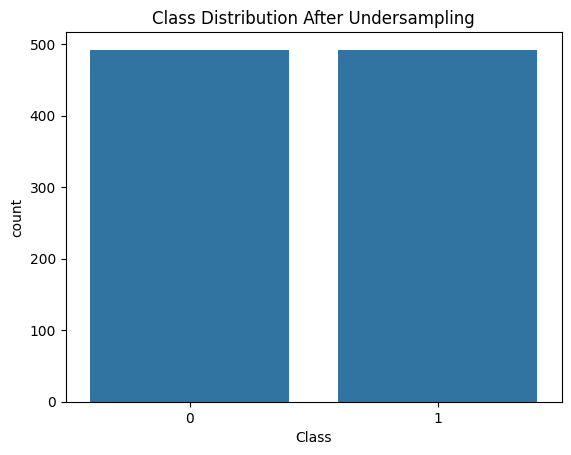

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = data[data['Class'] == 0]
minority_class = data[data['Class'] == 1]

# Perform undersampling on the majority class to match exactly 492 samples
majority_class_downsampled = resample(majority_class,
                                      replace=False,    # sample without replacement
                                      n_samples=len(minority_class),  # match minority class count (492)
                                      random_state=42)  # reproducible results

# Combine the undersampled majority class with the minority class
undersampled_data = pd.concat([majority_class_downsampled, minority_class])

# Shuffle the combined dataset
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after undersampling
sns.countplot(x='Class', data=undersampled_data)
plt.title('Class Distribution After Undersampling')
plt.show()


In [ ]:
n = undersampled_data[undersampled_data['Class'] == 0].shape[0]
print(n)

492


# Splitting a DataFrame into Features (X) and Target (Y)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

all_columns = data.columns.tolist()

columns = [col for col in all_columns if col != 'Class']

target = 'Class'

X = undersampled_data[columns]
Y = undersampled_data[target]

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (984, 30)
Shape of Y: (984,)


## Split data into Train and test datset (20% test and 80% train)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (787, 30)
Shape of X_test: (197, 30)
Shape of Y_train: (787,)
Shape of Y_test: (197,)


### Feature Scaling (Example)
#### Converting different units and magnitude data in one unit.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)
X_test_sc.dtype

dtype('float64')

# 3.Machine Learning Model Building

#### import packages

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

## Decision Tree Classifier


In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
dt_clf_sc = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_clf_sc.fit(X_train_sc, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_dt_sc = dt_clf_sc.predict(X_test_sc)
accuracy = accuracy_score(Y_test, y_pred_dt_sc)
print("Decision Tree Classifier with Scaled Data Accuracy:", accuracy)

Decision Tree Classifier with Scaled Data Accuracy: 0.8730964467005076


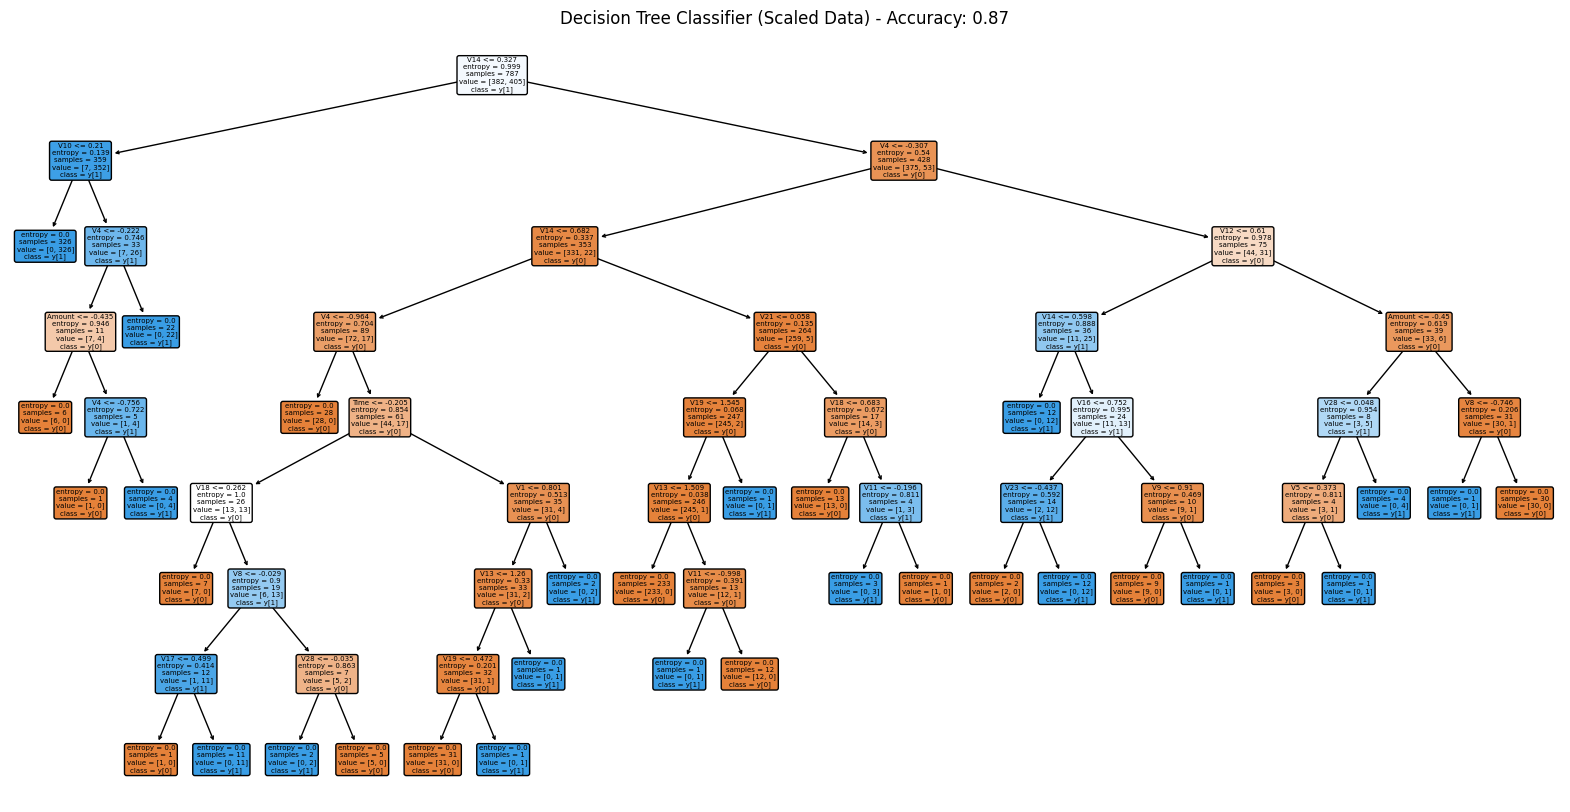

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_clf_sc, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title(f"Decision Tree Classifier (Scaled Data) - Accuracy: {accuracy:.2f}")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, y_pred_dt_sc)
print(cm)
cr=classification_report(Y_test, y_pred_dt_sc)
print(cr)


[[98 12]
 [13 74]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.86      0.85      0.86        87

    accuracy                           0.87       197
   macro avg       0.87      0.87      0.87       197
weighted avg       0.87      0.87      0.87       197



## Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=5)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=5)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(Y_test, y_pred_rf))

In [ ]:
rf_clf_sc = RandomForestClassifier(n_estimators=20, criterion="entropy", random_state=5)
rf_clf_sc.fit(X_train_sc, Y_train)
y_pred_rf_sc = rf_clf_sc.predict(X_test_sc)
print("Random Forest Classifier with Scaled Data Accuracy:", accuracy_score(Y_test, y_pred_rf_sc))

##  AdaBoost Classifier

Treat as example

In [ ]:
abd_clf = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", random_state=20),
                              n_estimators=200,
                              learning_rate=0.1,
                              algorithm="SAMME.R",
                              random_state=1)
abd_clf.fit(X_train, Y_train)

y_pred_abd = abd_clf.predict(X_test)
print("AdaBoost Classifier Accuracy:", accuracy_score(Y_test, y_pred_abd))

In [ ]:
# Train with Standard Scalar, fit on X_train_sc achieved by scaling
abd_clf_sc = AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy", random_state=20),
                                 n_estimators=200,
                                 learning_rate=0.1,
                                 algorithm="SAMME.R",
                                 random_state=1)
abd_clf_sc.fit(X_train_sc, Y_train)
y_pred_abd_sc = abd_clf_sc.predict(X_test_sc)
print("AdaBoost Classifier with Scaled Data Accuracy:", accuracy_score(Y_test, y_pred_abd_sc))

##  XGBoost Classifier

[Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [ ]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf.fit(X_train, Y_train)
y_pred_xgb = xgb_clf.predict(X_test)
print("XGBoost Classifier Accuracy:", accuracy_score(Y_test, y_pred_xgb))

In [ ]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
xgb_clf_sc = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_clf_sc.fit(X_train_sc, Y_train)
y_pred_xgb_sc = xgb_clf_sc.predict(X_test_sc)
print("XGBoost Classifier with Scaled Data Accuracy:", accuracy_score(Y_test, y_pred_xgb_sc))

## Confusion Matrix
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
#create confusion matrix under the name "cm"
y_pred = y_pred_rf
cm = confusion_matrix(Y_test, y_pred)

In [ ]:
#plot the matrix using the seaborn library. REFER: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Valid', 'Fraud'], yticklabels=['Valid', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Classification report of model

Print a classification report: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
print("Classification Report:")
print(classification_report(Y_test, y_pred))